## D-Handling Missing values by Replacing them with Next Value – Backward Fill

In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv('data.csv')
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [4]:
df.shape

(1000000, 81)

In [10]:
df.isnull()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

row_id        0
F_1_0     18397
F_1_1     18216
F_1_2     18008
F_1_3     18250
          ...  
F_4_10    18225
F_4_11    18119
F_4_12    18306
F_4_13    17995
F_4_14    18267
Length: 81, dtype: int64

In [12]:
df.isnull().sum().sum()


1000000

In [13]:
df1 = df.sample(frac =.05)
df1.shape

(50000, 81)

In [14]:
import datasist as ds #import datasist library
ds.structdata.describe(df1)

First five data points


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
374518,374518,-1.061827,0.630621,1.659310,-1.223716,0.835274,0.017335,-0.344031,0.131091,-0.054172,...,6.333508,-1.872716,-2.267062,-1.023308,0.305006,1.075367,11.128781,1.143293,-0.961897,-0.360349
504311,504311,0.181146,-1.404271,0.407638,0.306433,-1.330200,-0.082847,-0.813254,1.488246,0.040886,...,-3.997741,3.120079,-2.686016,1.088537,1.490585,-1.024096,-11.886475,1.929780,3.573445,-1.198991
690990,690990,0.213383,-0.507321,-0.269389,NaN,0.311004,0.608852,0.037100,-0.277910,0.989831,...,-3.468333,-0.123465,1.835476,-0.128301,1.117661,0.568026,0.931582,-1.670730,-0.624576,-0.004793
817820,817820,-0.244885,0.105065,-3.341072,-0.000130,0.255330,0.231033,-1.751569,0.982878,-0.718578,...,1.874776,-0.496296,1.510465,-2.204864,1.045365,1.019478,15.422838,-1.927538,-1.237006,0.059419
906372,906372,-1.300165,-0.045873,0.726298,0.996373,0.110737,-1.606194,-0.714286,0.338352,0.040519,...,1.458283,-2.106573,0.312168,0.007356,-0.157647,0.122715,2.437807,2.092027,-0.473077,0.474925




Random five data points


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
145729,145729,0.053083,0.281795,1.800174,0.438458,0.231454,2.318025,0.301275,-0.498080,0.587645,...,2.222877,3.375986,0.541049,1.547215,-0.777363,0.349759,NaN,-4.512932,1.156306,-2.212497
584784,584784,-1.359503,0.178964,-0.923304,0.999266,0.359052,-0.415923,-0.001914,0.015333,0.781768,...,0.621908,1.835236,3.646325,-0.270368,0.773635,0.703410,3.652024,1.827049,-1.393695,0.728173
877696,877696,-0.332758,-0.837158,NaN,1.026768,0.429287,0.427136,0.877606,0.522561,-0.460820,...,1.252187,0.209463,1.498821,0.416797,-0.242895,0.639093,-1.759602,-1.049691,2.281220,-0.046127
311203,311203,1.638925,-0.784860,0.282797,1.285046,-0.559197,-0.520572,0.584506,0.778165,0.525345,...,-0.479563,NaN,-4.382253,0.551104,-1.835129,-0.344900,-9.700589,3.160513,3.608406,-0.000746
550284,550284,0.931579,1.878401,0.027912,1.206018,-0.340038,-0.957928,NaN,0.605522,-1.141164,...,1.242457,0.089800,2.515195,-0.336499,-0.535989,0.153518,6.146425,0.844304,0.434440,0.006015




Last five data points


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
459043,459043,-0.253106,0.401137,0.036455,0.985455,-0.596408,-0.337893,1.293292,0.533955,-1.187332,...,4.155520,1.924952,-7.811219,1.431483,-0.325214,NaN,-6.029731,5.047129,-1.398805,-0.389415
405932,405932,-0.362970,0.604663,-0.282430,1.264022,0.749079,0.824921,-0.588005,-0.730623,0.935257,...,1.260407,2.914984,0.207130,0.052863,-0.360857,0.401582,1.244766,-0.413599,1.233528,-0.148773
756148,756148,1.414793,2.047601,-0.203025,0.772849,-0.802923,-0.993937,-0.309237,0.396949,0.059499,...,0.853819,-1.063502,3.853848,-1.075564,1.672931,-0.129137,-2.350908,-0.381005,4.431280,-1.185183
24532,24532,-0.235980,-1.870875,-0.610159,0.851440,-0.008106,0.163818,0.582797,0.345595,0.501276,...,1.464655,-0.658577,4.512805,0.857496,-0.184203,-0.811096,3.946665,-4.351939,1.371151,-0.622356
761131,761131,-0.319208,-0.974648,-1.225518,0.942838,-1.633557,-1.079625,0.355026,0.484691,-0.949640,...,0.880790,4.886867,4.492157,0.809947,0.613135,0.938506,1.194780,NaN,-0.066384,-0.749723




Shape of  data set: (50000, 81)


Size of  data set: 4050000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
row_id,int64
F_1_0,float64
F_1_1,float64
F_1_2,float64
F_1_3,float64
...,...
F_4_10,float64
F_4_11,float64
F_4_12,float64
F_4_13,float64




Numerical Features in Data set
['row_id', 'F_1_0', 'F_1_1', 'F_1_2', 'F_1_3', 'F_1_4', 'F_1_5', 'F_1_6', 'F_1_7', 'F_1_8', 'F_1_9', 'F_1_10', 'F_1_11', 'F_1_12', 'F_1_13', 'F_1_14', 'F_2_0', 'F_2_1', 'F_2_2', 'F_2_3', 'F_2_4', 'F_2_5', 'F_2_6', 'F_2_7', 'F_2_8', 'F_2_9', 'F_2_10', 'F_2_11', 'F_2_12', 'F_2_13', 'F_2_14', 'F_2_15', 'F_2_16', 'F_2_17', 'F_2_18', 'F_2_19', 'F_2_20', 'F_2_21', 'F_2_22', 'F_2_23', 'F_2_24', 'F_3_0', 'F_3_1', 'F_3_2', 'F_3_3', 'F_3_4', 'F_3_5', 'F_3_6', 'F_3_7', 'F_3_8', 'F_3_9', 'F_3_10', 'F_3_11', 'F_3_12', 'F_3_13', 'F_3_14', 'F_3_15', 'F_3_16', 'F_3_17', 'F_3_18', 'F_3_19', 'F_3_20', 'F_3_21', 'F_3_22', 'F_3_23', 'F_3_24', 'F_4_0', 'F_4_1', 'F_4_2', 'F_4_3', 'F_4_4', 'F_4_5', 'F_4_6', 'F_4_7', 'F_4_8', 'F_4_9', 'F_4_10', 'F_4_11', 'F_4_12', 'F_4_13', 'F_4_14']


Categorical Features in Data set


[]



Statistical Description of Columns


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,50000.000000,49098.000000,49114.000000,49085.000000,49133.000000,49118.000000,49089.000000,49076.000000,49138.000000,49129.000000,...,49104.000000,49065.000000,49104.000000,49143.000000,49085.000000,49108.000000,49074.000000,49098.000000,49085.000000,49113.000000
mean,500931.338860,-0.000028,-0.003563,-0.003325,0.000625,0.001996,-0.000742,-0.004635,-0.061886,0.004561,...,0.344469,0.001042,0.321221,-0.070787,-0.077551,0.041889,0.564751,0.336159,0.323767,0.034267
std,288976.051532,0.998098,1.000847,0.996963,1.001583,0.996538,0.995384,0.998583,0.720976,1.002033,...,2.352408,2.298158,2.359382,0.778259,0.809206,0.705430,5.024285,2.382769,2.366548,0.781045
min,47.000000,-4.210806,-4.790594,-3.850423,-4.226710,-4.465097,-4.173942,-3.987817,-4.524787,-4.036429,...,-9.477235,-8.921486,-10.320713,-6.552848,-6.309193,-4.847308,-21.785440,-9.909819,-9.372532,-5.968264
25%,250898.000000,-0.676097,-0.681046,-0.679796,-0.675747,-0.675377,-0.671602,-0.677562,-0.493878,-0.672432,...,-1.258121,-1.576988,-1.258071,-0.517748,-0.577302,-0.377795,-2.789793,-1.267881,-1.306967,-0.397700
50%,503642.000000,-0.003046,-0.003514,-0.001658,0.003674,0.006197,-0.004320,-0.003724,0.005208,0.006825,...,0.304378,-0.071922,0.366430,0.020267,-0.023213,0.104172,0.240798,0.348361,0.272768,0.130668
75%,751022.250000,0.671162,0.668454,0.667513,0.672717,0.678507,0.668917,0.663694,0.440470,0.679385,...,1.919064,1.512651,1.922230,0.473942,0.485056,0.528112,3.672595,1.962377,1.906549,0.574794
max,999997.000000,3.910583,3.922101,4.267985,4.782744,4.262492,3.961596,4.957977,2.451543,4.480793,...,10.035666,10.676580,9.738516,2.287527,2.543998,2.242406,23.891324,10.512320,10.781856,2.562225




Description of Categorical Features


C:\Users\PC\anaconda3\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\PC\anaconda3\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\PC\anaconda3\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:


ValueError: No objects to concatenate

In [ ]:
ds.structdata.display_missing(df1)

In [10]:
import matplotlib.pyplot as plt
ds.visualizations.countplot(df1)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


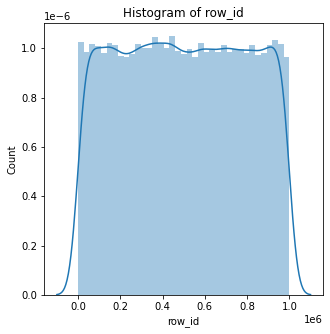

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


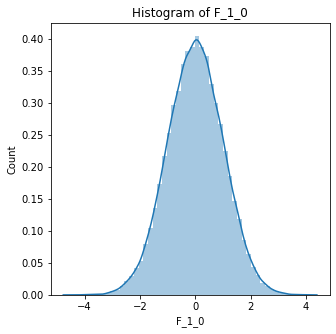

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


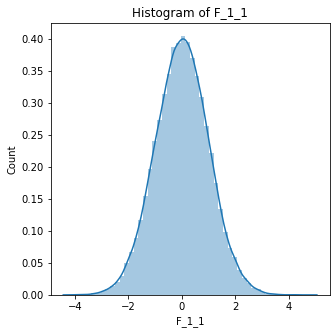

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


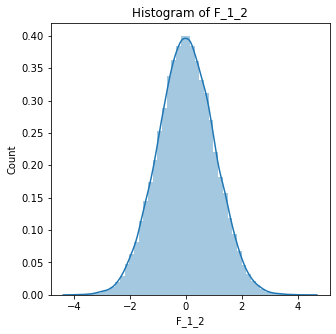

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


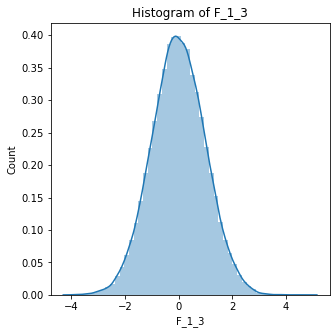

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


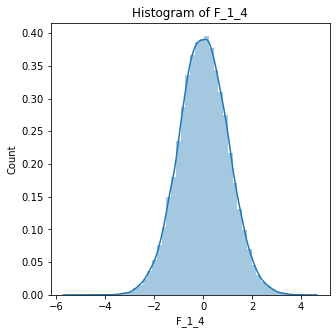

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


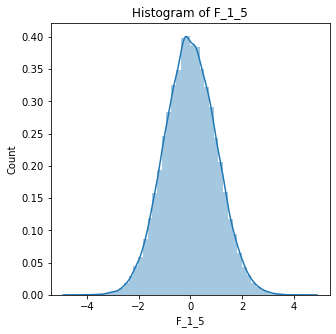

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


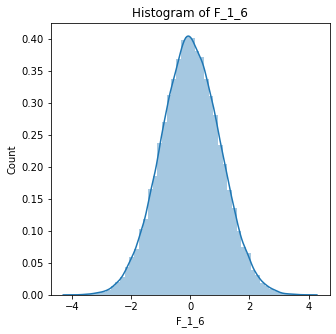

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


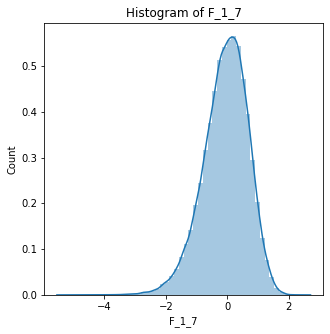

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


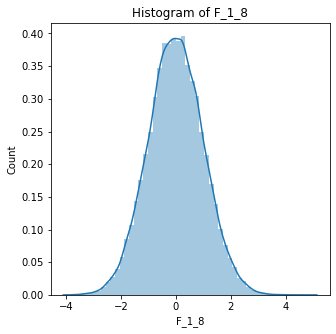

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


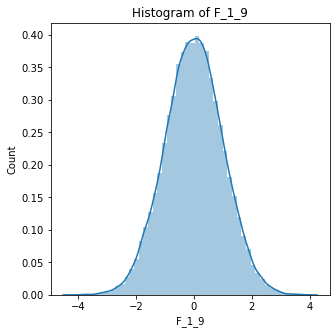

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


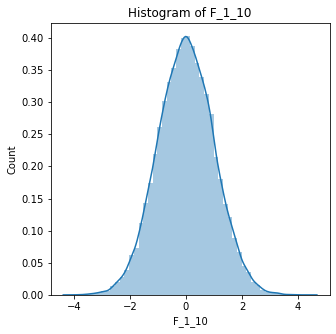

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


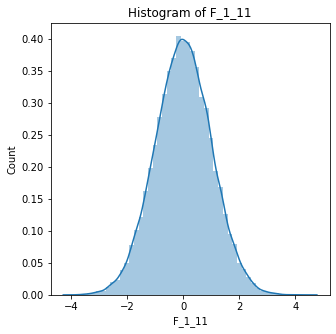

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


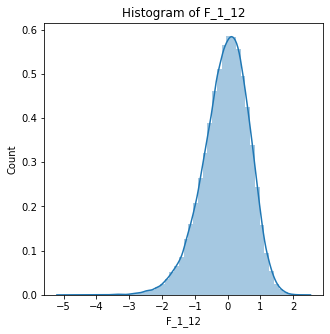

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


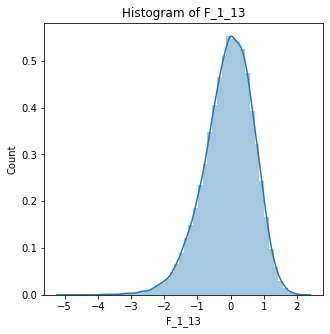

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


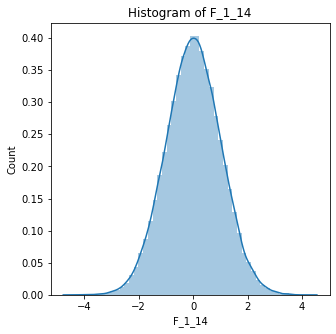

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


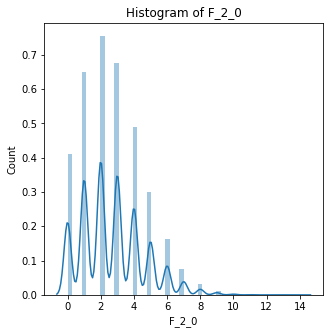

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


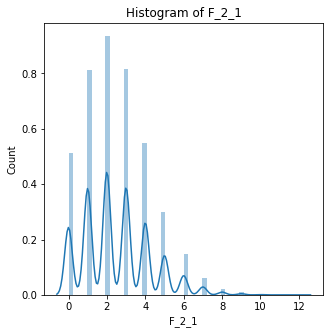

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


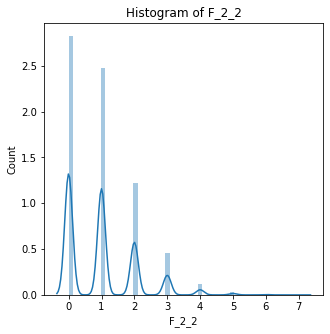

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


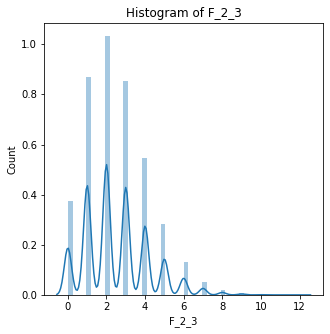

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


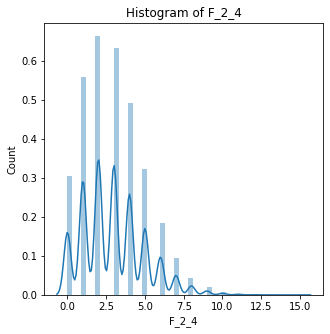

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


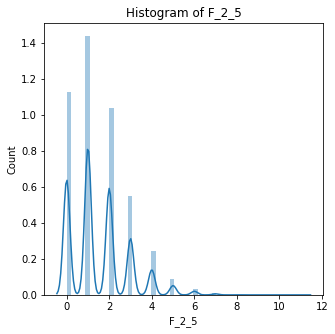

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


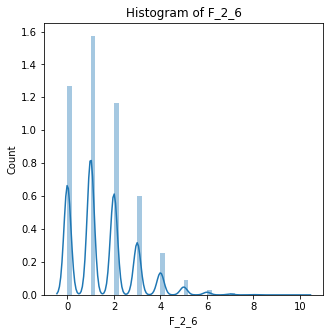

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


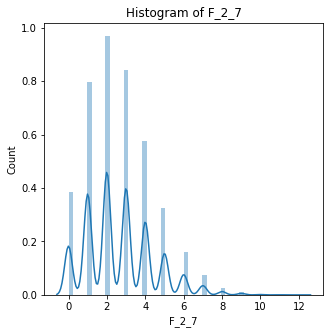

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


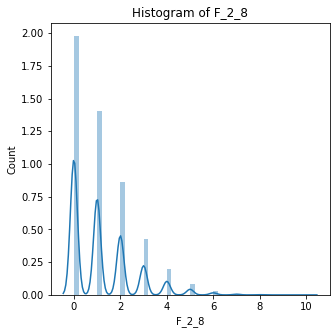

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


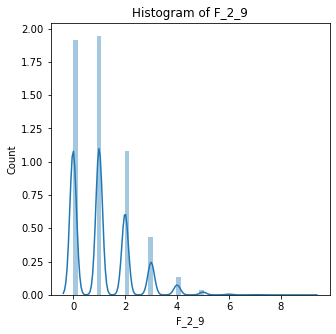

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


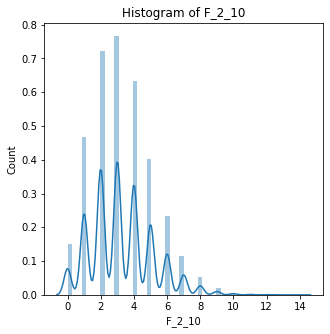

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


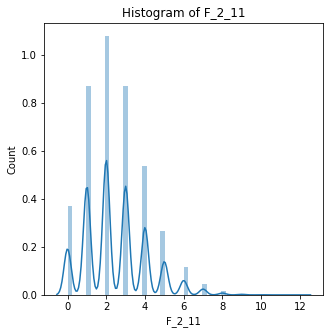

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


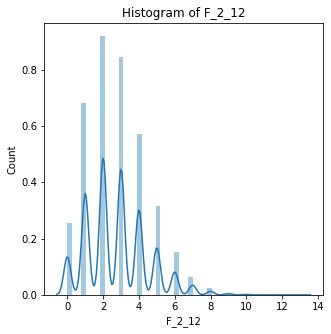

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


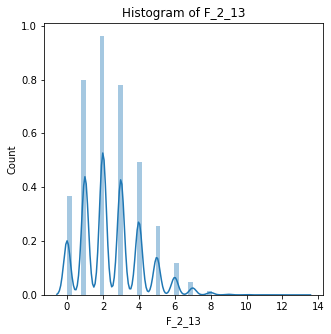

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


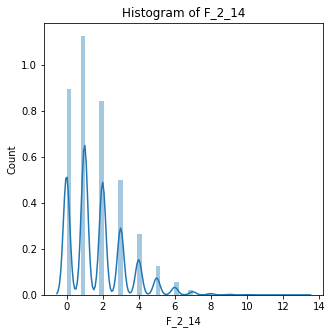

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


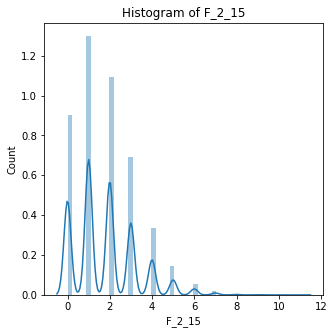

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


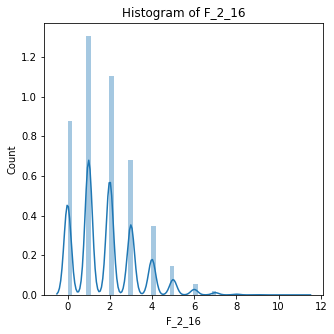

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


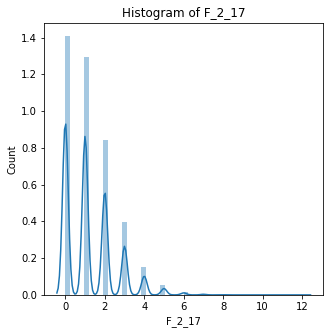

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


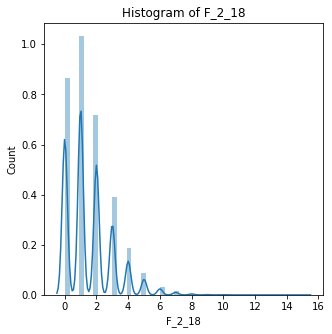

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


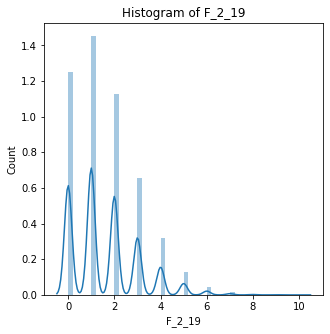

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


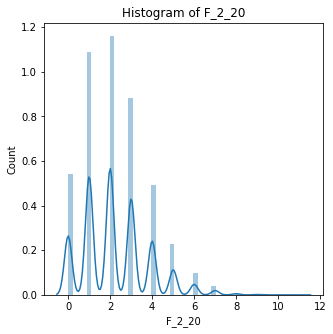

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


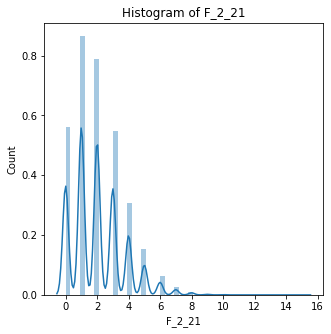

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


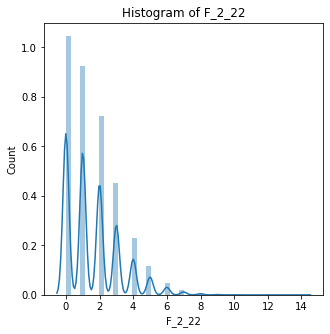

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


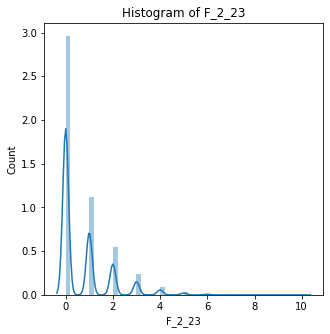

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


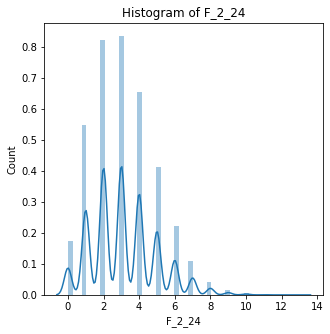

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


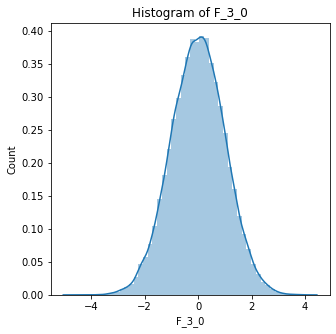

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


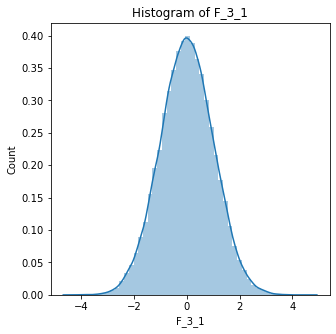

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


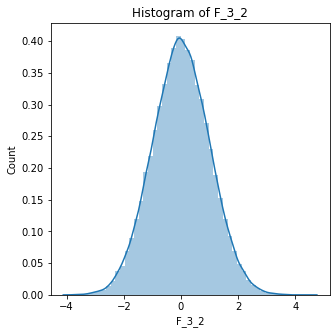

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


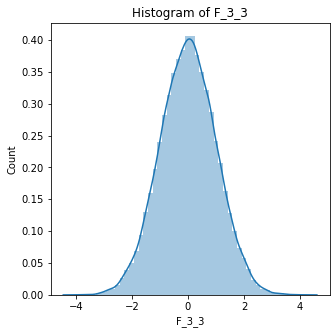

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


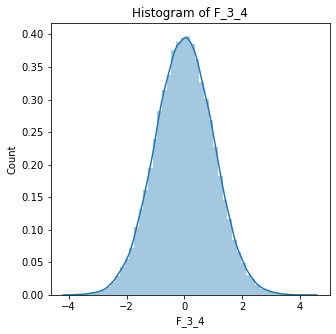

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


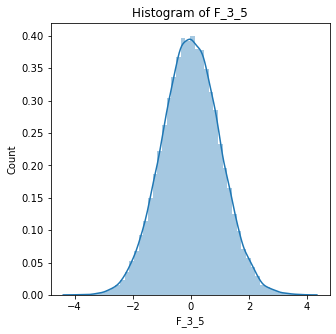

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


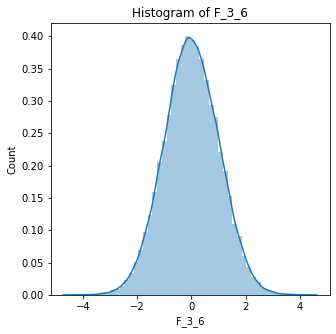

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


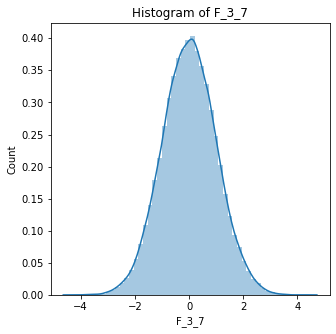

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


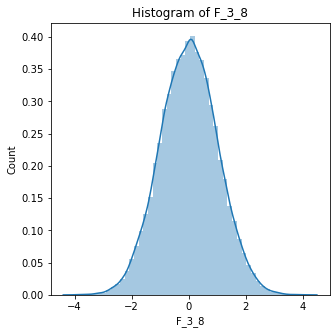

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


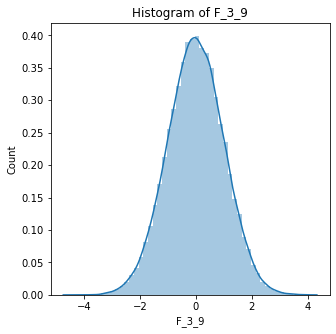

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


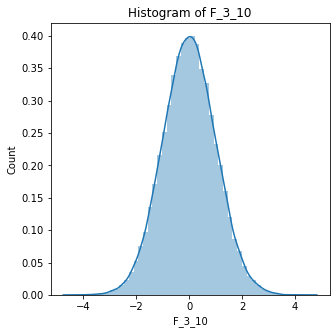

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


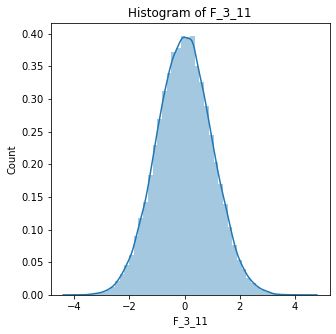

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


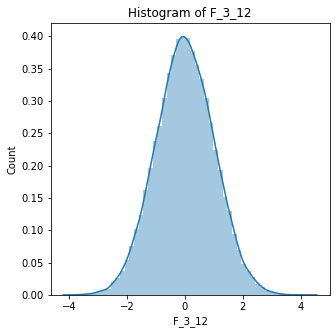

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


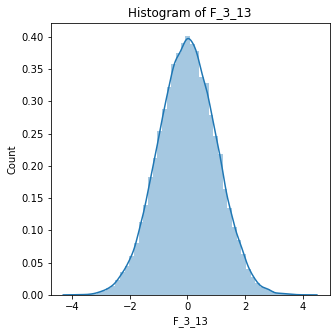

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


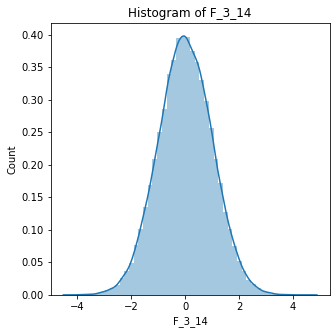

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


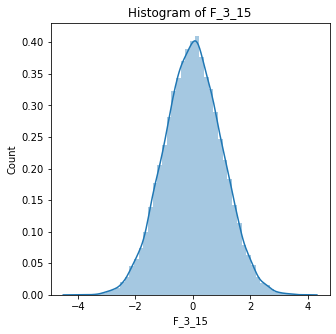

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


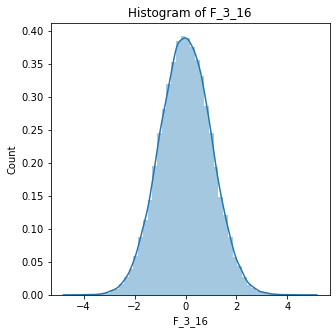

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


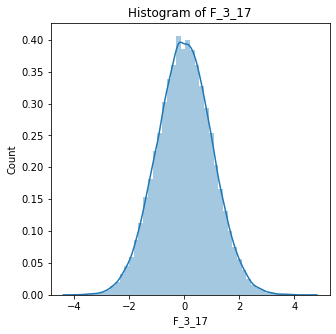

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


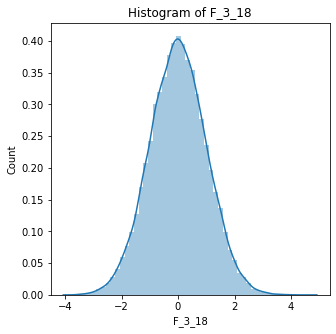

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


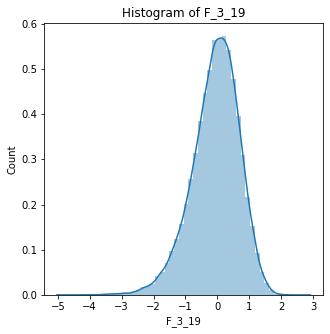

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


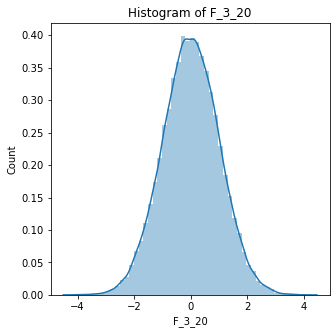

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


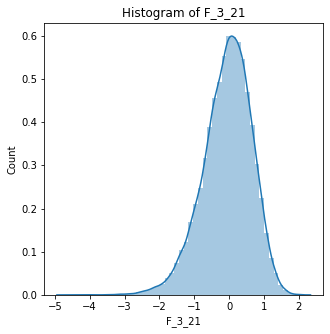

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


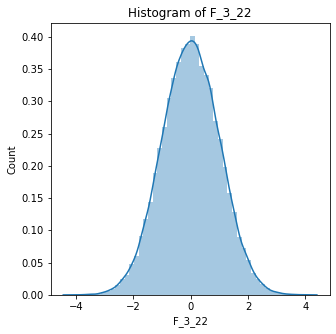

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


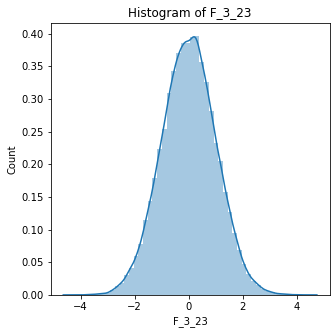

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


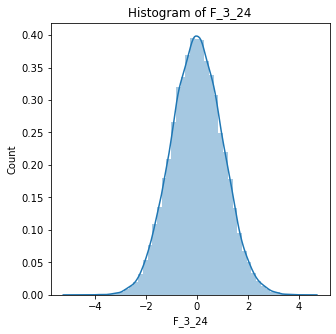

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


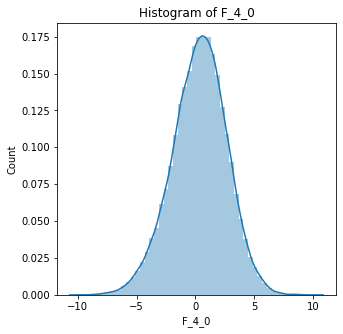

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


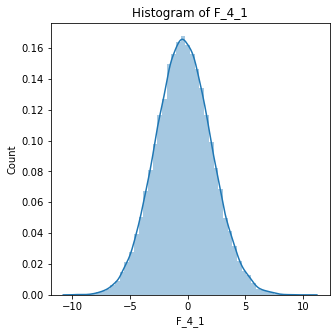

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


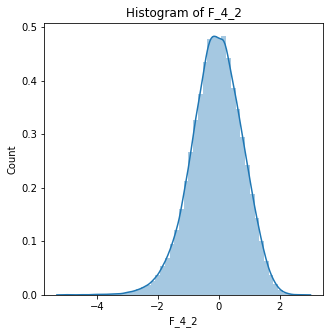

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


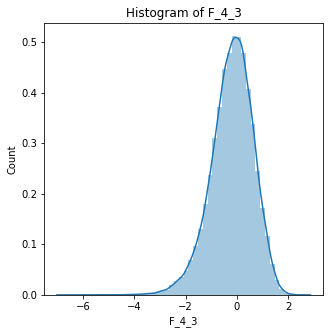

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


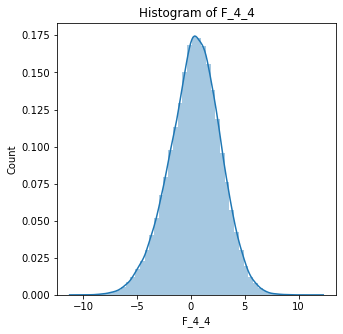

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


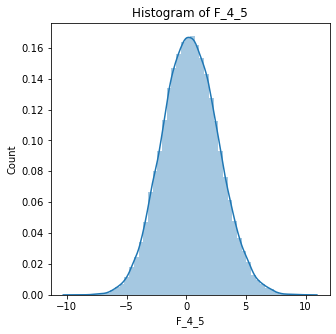

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


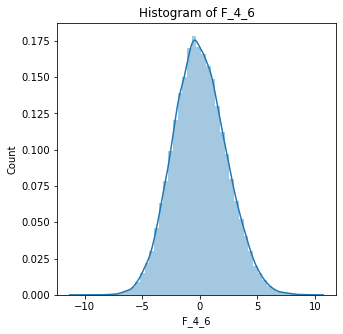

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


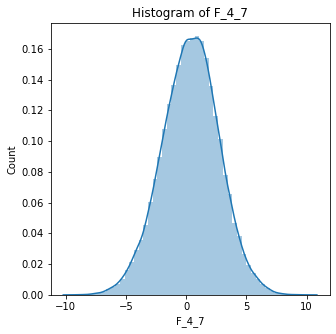

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


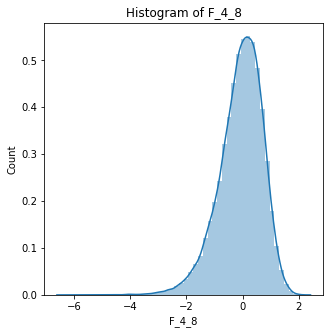

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


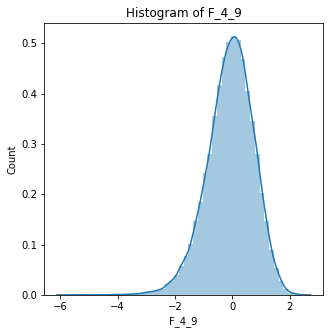

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


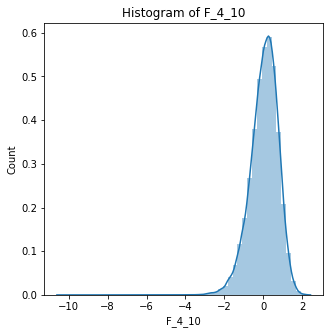

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


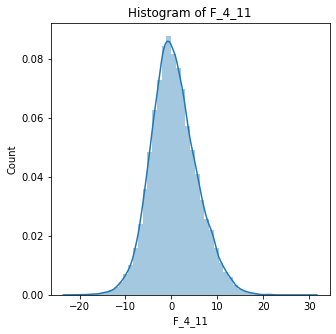

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


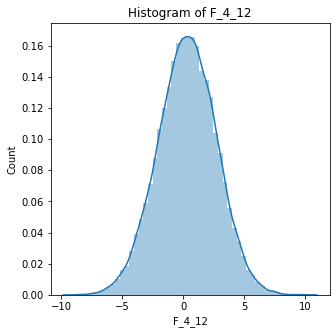

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


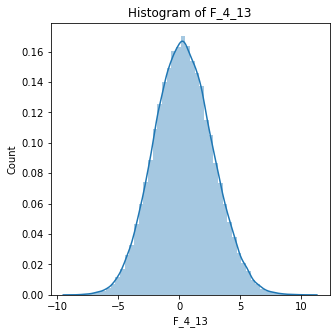

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


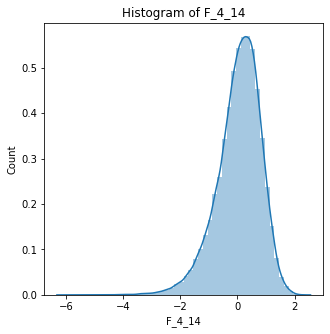

In [11]:
ds.visualizations.histogram(df1)

In [12]:
df1.isnull().sum()

row_id      0
F_1_0     866
F_1_1     912
F_1_2     896
F_1_3     984
         ... 
F_4_10    919
F_4_11    940
F_4_12    902
F_4_13    870
F_4_14    854
Length: 81, dtype: int64

In [13]:
df1.isnull().sum().sum()

49827

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 215715 to 691406
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  50000 non-null  int64  
 1   F_1_0   49134 non-null  float64
 2   F_1_1   49088 non-null  float64
 3   F_1_2   49104 non-null  float64
 4   F_1_3   49016 non-null  float64
 5   F_1_4   49086 non-null  float64
 6   F_1_5   49059 non-null  float64
 7   F_1_6   49137 non-null  float64
 8   F_1_7   49099 non-null  float64
 9   F_1_8   49112 non-null  float64
 10  F_1_9   49123 non-null  float64
 11  F_1_10  49106 non-null  float64
 12  F_1_11  49081 non-null  float64
 13  F_1_12  49189 non-null  float64
 14  F_1_13  49059 non-null  float64
 15  F_1_14  49116 non-null  float64
 16  F_2_0   50000 non-null  int64  
 17  F_2_1   50000 non-null  int64  
 18  F_2_2   50000 non-null  int64  
 19  F_2_3   50000 non-null  int64  
 20  F_2_4   50000 non-null  int64  
 21  F_2_5   50000 non-null  int64

In [15]:
df1.describe()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,50000.000000,49098.000000,49114.000000,49085.000000,49133.000000,49118.000000,49089.000000,49076.000000,49138.000000,49129.000000,...,49104.000000,49065.000000,49104.000000,49143.000000,49085.000000,49108.000000,49074.000000,49098.000000,49085.000000,49113.000000
mean,500931.338860,-0.000028,-0.003563,-0.003325,0.000625,0.001996,-0.000742,-0.004635,-0.061886,0.004561,...,0.344469,0.001042,0.321221,-0.070787,-0.077551,0.041889,0.564751,0.336159,0.323767,0.034267
std,288976.051532,0.998098,1.000847,0.996963,1.001583,0.996538,0.995384,0.998583,0.720976,1.002033,...,2.352408,2.298158,2.359382,0.778259,0.809206,0.705430,5.024285,2.382769,2.366548,0.781045
min,47.000000,-4.210806,-4.790594,-3.850423,-4.226710,-4.465097,-4.173942,-3.987817,-4.524787,-4.036429,...,-9.477235,-8.921486,-10.320713,-6.552848,-6.309193,-4.847308,-21.785440,-9.909819,-9.372532,-5.968264
25%,250898.000000,-0.676097,-0.681046,-0.679796,-0.675747,-0.675377,-0.671602,-0.677562,-0.493878,-0.672432,...,-1.258121,-1.576988,-1.258071,-0.517748,-0.577302,-0.377795,-2.789793,-1.267881,-1.306967,-0.397700
50%,503642.000000,-0.003046,-0.003514,-0.001658,0.003674,0.006197,-0.004320,-0.003724,0.005208,0.006825,...,0.304378,-0.071922,0.366430,0.020267,-0.023213,0.104172,0.240798,0.348361,0.272768,0.130668
75%,751022.250000,0.671162,0.668454,0.667513,0.672717,0.678507,0.668917,0.663694,0.440470,0.679385,...,1.919064,1.512651,1.922230,0.473942,0.485056,0.528112,3.672595,1.962377,1.906549,0.574794
max,999997.000000,3.910583,3.922101,4.267985,4.782744,4.262492,3.961596,4.957977,2.451543,4.480793,...,10.035666,10.676580,9.738516,2.287527,2.543998,2.242406,23.891324,10.512320,10.781856,2.562225


<AxesSubplot:>

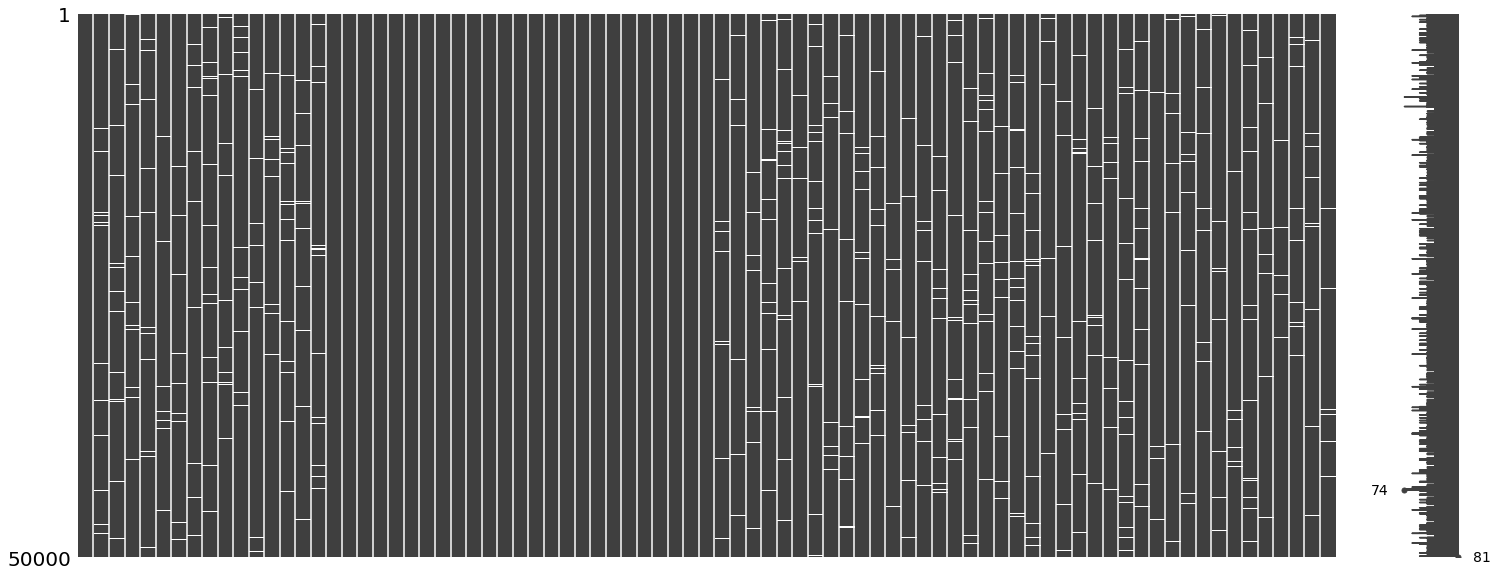

In [16]:
import missingno as msno
%matplotlib inline
msno.matrix(df1)


## D-Handling Missing values by Replacing with Next Value – Backward Fill

In [17]:
df5=df1.fillna(method='bfill')

In [18]:
df5.isnull().sum()

row_id    0
F_1_0     0
F_1_1     0
F_1_2     0
F_1_3     0
         ..
F_4_10    0
F_4_11    0
F_4_12    1
F_4_13    0
F_4_14    0
Length: 81, dtype: int64

In [19]:
df5.isnull().sum().sum()

1

<AxesSubplot:>

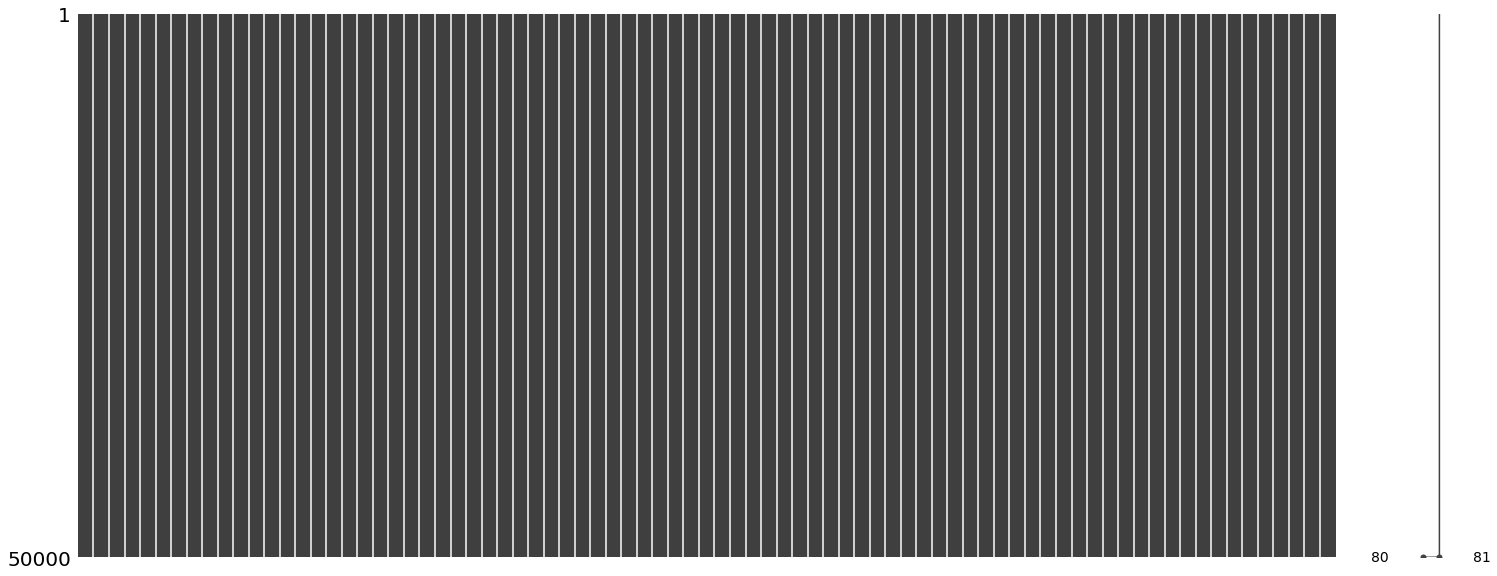

In [20]:
import missingno as msno
%matplotlib inline
msno.matrix(df5)

In [21]:
X=df5.iloc[:,1:-1].values
y=df5.iloc[:,-1].values

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
print(X.shape)

(50000, 79)


In [24]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

continuous


In [25]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train= label_encoder.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))

continuous
multiclass


## 1- Decision Tree for Replacing with Next Value – Backward Fill

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train,y_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
tree.fit(X_train,y_train)

In [ ]:
print('The accuracy of Decision Tree: ',tree.score(X_train,y_train))

In [ ]:
prediction=tree.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
prediction=tree.predict(X_test)

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Decision Tree")
plt.scatter(y_test,prediction)
plt.plot([-6,10],[-6,40000],color='red')
plt.show()  

## 2- Random Forest for Replacing with Next Value – Backward Fill


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forst=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forst.fit(X_train,y_train)

In [ ]:
print('The accuracy of Random Forest : ',forst.score(X_train,y_train))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
forst.fit(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
prediction=forst.predict(X_test)

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Random Forest")
plt.scatter(y_test,prediction)
plt.plot([-6,5],[-10000,20000],color='red')
plt.show()

## 3- Linear Regression for Replacing with Next Value – Backward Fill

In [44]:
from sklearn.linear_model import LinearRegression
Lin=LinearRegression()
Lin.fit(X_train,y_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Lin.fit(X_train,y_train)

LinearRegression()

In [45]:
print('The accuracy of LinearRegression: ',Lin.score(X_train,y_train))

The accuracy of LinearRegression:  0.6054184594091512


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
Lin.intercept_

19564.954075

In [ ]:
prediction=Lin.predict(X_test)

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression")
plt.scatter(y_test,prediction)
plt.plot([-4,2],[-40000,60000],color='red')
plt.show()